In [34]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np



In [2]:
# data from health personnel reports
health_personnel_totals = [{'year': 2013, 'total_mo': 16690}, {'year': 2014, 'total_mo': 17615}, {'year': 2015, 'total_mo': 18243}, {'year': 2016, 'total_mo': 18968}, {'year': 2017, 'total_mo': 19800}, {'year': 2018, 'total_mo': 19720}, {'year': 2019, 'total_mo': 20381}]

In [3]:
health_personnel = pd.DataFrame(health_personnel_totals)
health_personnel.head()

,year,total_mo
0,2013,16690
1,2014,17615
2,2015,18243
3,2016,18968
4,2017,19800


In [4]:
total_inpatients = [{'year': 2013, 'total_patients': 5926125}, {'year': 2014, 'total_patients': 6120470}, {'year': 2015, 'total_patients': 6359681}, {'year': 2016, 'total_patients': 6497773},{'year': 2017, 'total_patients': 6910249}, {'year': 2018, 'total_patients': 7116268}, {'year': 2019, 'total_patients': 7477860}]

In [5]:
inpatients = pd.DataFrame(total_inpatients)
inpatients.head()

,year,total_patients
0,2013,5926125
1,2014,6120470
2,2015,6359681
3,2016,6497773
4,2017,6910249


In [6]:
data = pd.merge(left=health_personnel, right=inpatients, on='year', how='left')
data['patients_per_mo'] = data['total_patients'] / data['total_mo']
data.head()

,year,total_mo,total_patients,patients_per_mo
0,2013,16690,5926125,355.070401
1,2014,17615,6120470,347.457848
2,2015,18243,6359681,348.609384
3,2016,18968,6497773,342.565004
4,2017,19800,6910249,349.002475


In [39]:
lr_mo = LinearRegression()

X = np.array(data['year']).reshape(-1, 1)
y = np.array(data['total_mo'])

lr_mo.fit(X, y)

LinearRegression()

In [40]:
mo_prediction = lr_mo.predict([[2020]])
mo_prediction

array([21179.57142857])

In [41]:
lr_patient = LinearRegression()

X = np.array(data['year']).reshape(-1, 1)
y = np.array(data['total_patients'])

lr_patient.fit(X, y)

LinearRegression()

In [42]:
patients_predict = lr_patient.predict([[2020]])
patients_predict

array([7657970.71428573])

In [44]:
ratio_prediction = patients_predict / mo_prediction
ratio_prediction

array([361.57345016])

In [49]:
years_with_pred = np.append(data['year'].values, 2020)
years_with_pred

array([2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020], dtype=int64)

In [50]:
patients_with_pred = np.append(data['total_patients'], patients_predict)
mo_count_with_pred = np.append(data['total_mo'], mo_prediction)

In [53]:
years_with_pred[-2:]

array([2019, 2020], dtype=int64)

TypeError: _AxesBase.set_facecolor() got an unexpected keyword argument 'label'

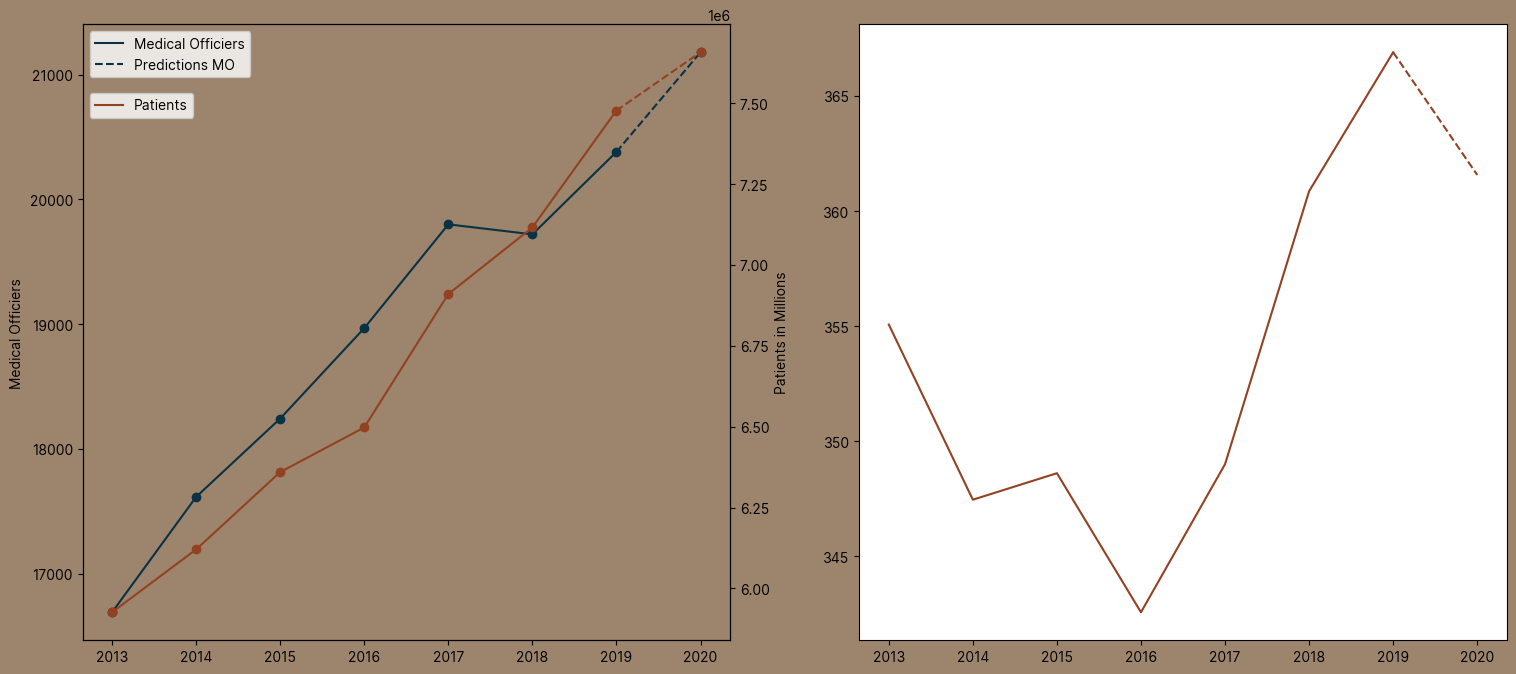

In [79]:
# plt.rcParams["font.family"] = "sans-serif"
plt.rcParams['font.sans-serif'] = 'Inter'
fig = plt.figure(figsize=(16,8))
fig.set_facecolor((156/255, 132/255, 109/255))
fig.tight_layout()
fig.subplots_adjust(left=0.1, right=0.99)
ax = fig.add_subplot(1,2,1)
ay = fig.add_subplot(1,2,2)

ax.plot(data['year'], data['total_mo'], color=(10/255, 50/255, 68/255), label='Medical Officiers')
ax.scatter(years_with_pred, mo_count_with_pred, color=(10/255, 50/255, 68/255))
# trend line
ax.plot(years_with_pred[-2:], mo_count_with_pred[-2:], '--', color=(10/255, 50/255, 68/255), label='Predictions MO')
ax.set_facecolor((156/255, 132/255, 109/255))
ax.set_ylabel('Medical Officiers')

ax2 = ax.twinx()
ax2.plot(data['year'], data['total_patients'], color=(147/255, 66/255, 33/255), label='Patients')
ax2.scatter(years_with_pred, patients_with_pred, color=(147/255, 66/255, 33/255))

#trend
ax2.plot(years_with_pred[-2:], patients_with_pred[-2:], '--', color=(147/255, 66/255, 33/255))
# ax.set_title("Number of patients and medical officers")
ax.legend()
ax2.legend(loc='upper left', bbox_to_anchor=(0., 0.9))
ax2.set_ylabel("Patients in Millions")

## graph 2
ay.plot(data['year'], data['patients_per_mo'], color=(147/255, 66/255, 33/255), label='Patients per MO')
ay.plot(years_with_pred[-2:], np.append(data['patients_per_mo'], ratio_prediction)[-2:], '--', color=(147/255, 66/255, 33/255), label='Prediction Patient')
ay.set_facecolor((156/255, 132/255, 109/255))
ay.legend()
ay.set_ylabel('Number of patients per MO')
# ay.set_title("Number of patients per medical officer")
plt.show()